In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale, normalize

plt.style.use('seaborn-white')

# Análise dos dados

In [2]:
# Leitura do arquivo com dados
df = pd.read_pickle('./datasets/vagas/base_treinamento_testes.pkl')

In [3]:
# Quantidade de linhas e colunas
df.shape

(25699, 18)

In [4]:
# Inspeção dos valores do arquivo
df.head()

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga,aprovado_vaga
4146,-5433147389500583028,0.0,INDUSTRIAL TRAINEE,ENGENHARIA QUIMICA,JUNIOR/TRAINEE,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SALVADOR,2.0,1.0,6.450,0.000,6.25,7.00,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4147,-5433147389500583028,1500.0,DESENVOLVIMENTO ENGENHEIRO PRO,ADMINISTRACAO DE EMPRESAS,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,4.0,1.0,8.000,0.000,7.99,8.20,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4148,-5433147389500583028,2050.0,CLIENTE ESTAGIO QUALIDADE,ENGENHARIA DE PRODUCAO,ESTAGIO,FORMACAO SUPERIOR COMPLETA,ARUJA,2.0,0.0,3.875,0.000,5.33,5.40,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4149,-5433147389500583028,0.0,CONTA EXECUTIVO PARCERIA,MARKETING,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,3.0,0.0,7.250,0.000,7.99,6.25,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4150,-5433147389500583028,1890.0,CICLO PDCA,MARKETING,AUXILIAR/OPERACIONAL,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SAO PAULO,3.0,4.0,5.250,6.375,6.65,7.00,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0


## Contínuas

In [5]:
df_quant = df[['ultimo_salario_candidato', 'mediana_teste_ingles_candidato', 
               'mediana_teste_espanhol_candidato', 'mediana_teste_logica_candidato',
               'mediana_teste_outros_candidato']]

In [6]:
# Total de valores ausentes
df_quant.isnull().sum()

ultimo_salario_candidato            0
mediana_teste_ingles_candidato      0
mediana_teste_espanhol_candidato    0
mediana_teste_logica_candidato      0
mediana_teste_outros_candidato      0
dtype: int64

In [7]:
# Sumarização dos dados
df_quant.describe().T

,count,mean,std,min,25%,50%,75%,max
ultimo_salario_candidato,25699.0,4601.836180,81107.048057,0.0,0.00,1300.0,3000.00,5500000.0
mediana_teste_ingles_candidato,25699.0,4.899206,3.016324,0.0,2.75,6.0,7.25,10.0
mediana_teste_espanhol_candidato,25699.0,1.068842,2.282527,0.0,0.00,0.0,0.00,10.0
mediana_teste_logica_candidato,25699.0,5.194978,2.942852,0.0,4.00,6.0,7.33,10.0
mediana_teste_outros_candidato,25699.0,5.894444,2.411740,0.0,4.80,6.4,7.60,10.0


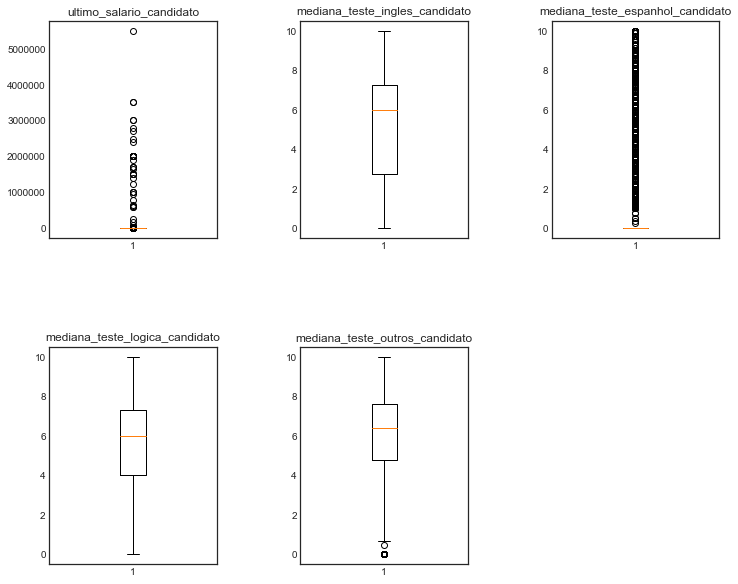

In [8]:
# Visualização da variância dos dados
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False, figsize=(12, 10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

feature = 0
for i in range(len(axs)):
    for j in range(len(axs[i])):
        if len(df_quant.columns) > feature:
            axs[i][j].boxplot(df_quant[df_quant.columns[feature]])
            axs[i][j].set_title(df_quant.columns[feature])
            feature += 1
        else:
            axs[i][j].set_visible(False)

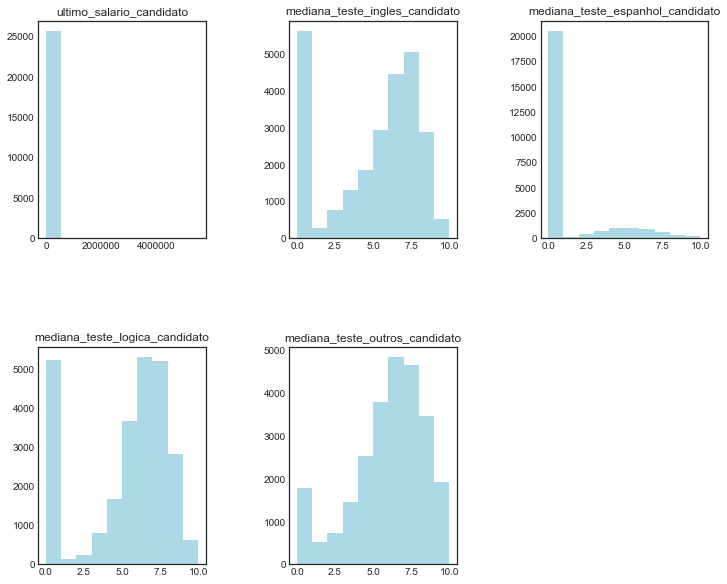

In [9]:
# Visualização da distribuição dos dados
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False, figsize=(12, 10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

feature = 0
for i in range(len(axs)):
    for j in range(len(axs[i])):
        if len(df_quant.columns) > feature:
            axs[i][j].hist(df_quant[df_quant.columns[feature]], color='lightblue')
            axs[i][j].set_title(df_quant.columns[feature])
            feature += 1
        else:
            axs[i][j].set_visible(False)

###  Último salário candidato

Apresenta problemas com valores extremos, média de 4601 com desvio padrão de 81107. Os valores até 75% aparentam estar certos.

In [10]:
df_quant['ultimo_salario_candidato'].quantile(0.99)

8434.34000000003

Até 99% dos dados estão coerentes a salários mensais brasileiros.

In [11]:
print('Total salários > 10.000:', df[df['ultimo_salario_candidato'] > 10000].count()[1])
print('Porcentagem de salários acima de 10.000:',
      df[df['ultimo_salario_candidato'] > 10000].count()[1] / df.count()[1])
print('Porcentagem de salários acima de 10.000 aprovado para vagas',
      df[df['ultimo_salario_candidato'] > 10000][df['aprovado_vaga'] == 1].count()[1]
      / df[df['aprovado_vaga'] == 1].count()[1])
print()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[df['ultimo_salario_candidato'] > 10000][['ultimo_cargo_candidato', 'ultimo_salario_candidato']])

Total salários > 10.000: 127
Porcentagem de salários acima de 10.000: 0.004941826530215183
Porcentagem de salários acima de 10.000 aprovado para vagas 0.005559968228752979

               ultimo_cargo_candidato  ultimo_salario_candidato
4661            BOLSISTA NOVA TALENTO                   25000.0
5135                MANAGER OPERATIOM                   15000.0
5533        CORROSIONISTA PESQUISADOR                   12000.0
5669    EXPORTACAO GERENTE IMPORTACAO                   12000.0
7286           ELETRICISTA ENGENHEIRO                   10354.0
7344                  MANAGER PROJECT                   10500.0
7418              GESTOR OPERACAO UTD                   11690.0
7679                  CONTA EXECUTIVO                   11000.0
7689                 ENGINEER SERVICE                   15000.0
7786   DESSALINIZACAO DIRETOR IRRIGAC                   15000.0
7909             DIMENSIONAL INSPETOR                   13000.0
7912            ACCOUNT EXECUTIVO KEY                   110

/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Analisando os salários com o último cargo informado, com salários acima de 10.000 existem cargos compatíveis, por exemplo EXPORTACAO GERENTE IMPORTACAO com 12.000. Entretando existem salários que indicam erros de entrada (digitação ou inserção de casas decimais), por exemplo, ADMINISTRATIVO ASSISTENTE com 36.000. Por fim, também existem salários que possivelmente estão em outra moeda, por exemplo, INGENIERO MECANICO PROJETO com 165.000.

### Medianas de testes

Em relação as medianas nota-se uma frequência elevada de valores 0, especialmente na mediana de teste de espanhol.

Esses valores provavelmente indicam que os testes não realizados pelos candidatos.

ultimo_salario_candidato            19
mediana_teste_ingles_candidato      19
mediana_teste_espanhol_candidato    19
mediana_teste_logica_candidato      19
mediana_teste_outros_candidato      19
dtype: int64


Text(0.5, 1, 'Dados filtrados')

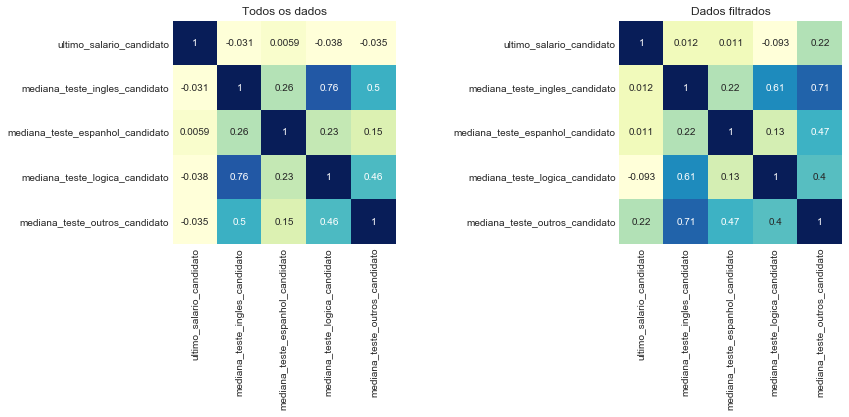

In [12]:
df_quant_clean = df_quant[df_quant['ultimo_salario_candidato'] > 10000]
df_quant_clean = df_quant_clean[df_quant_clean['mediana_teste_ingles_candidato'] > 0]
df_quant_clean = df_quant_clean[df_quant_clean['mediana_teste_espanhol_candidato'] > 0]
df_quant_clean = df_quant_clean[df_quant_clean['mediana_teste_logica_candidato'] > 0]
df_quant_clean = df_quant_clean[df_quant_clean['mediana_teste_outros_candidato'] > 0]

print(df_quant_clean.count())

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
fig.subplots_adjust(wspace=1.0, hspace=0.5)

corr = df_quant.corr()
sns.heatmap(data=corr, ax=axs[0], annot=True, square=True, cbar=False, cmap="YlGnBu")
axs[0].set_ylim(len(corr), 0.0)
axs[0].set_title('Todos os dados')

corr = df_quant_clean.corr()
sns.heatmap(data=corr, ax=axs[1], annot=True, square=True, cbar=False, cmap="YlGnBu")
axs[1].set_ylim(len(corr), 0.0)
axs[1].set_title('Dados filtrados')

Somente 19 candidatos fizeram todos os testes ao mesmo tempo, mesmo essa amostra não sendo representativa, a correlação entre as variáveis que representam a mediana não são tão afetadas pelos zeros quanto oa variável salário.

Excluir esses dados não é uma opção dada a seletividade alta ao considerar somente candidatos com todos os testes realizados.

## Categóricas numéricas

In [13]:
df_cat_number = df[['nivel_ingles_candidato', 'nivel_espanhol_candidato']]

In [14]:
df_cat_number.isnull().sum()

nivel_ingles_candidato      0
nivel_espanhol_candidato    0
dtype: int64

In [15]:
bars_english = df_cat_number['nivel_ingles_candidato'].value_counts()
bars_spanish = df_cat_number['nivel_espanhol_candidato'].value_counts()

Text(0.5, 1.0, 'nivel_espanhol_candidato')

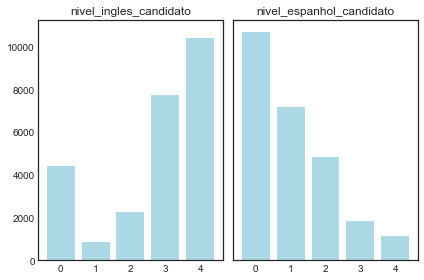

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, tight_layout=True)

axs[0].bar(bars_english.index, bars_english, color='lightblue')
axs[0].set_title('nivel_ingles_candidato')
axs[1].bar(bars_spanish.index, bars_spanish, color='lightblue')
axs[1].set_title('nivel_espanhol_candidato')

## Categóricas textuais

In [17]:
df_cat_text = df[['ultimo_cargo_candidato', 'area_interesse_candidato',
                 'nivel_candidato', 'formacao_candidato', 'cidade_candidato',
                 'cargo_vaga', 'nivel_vaga', 'formacao_vaga', 'cidade_vaga']]

In [18]:
# Sumarização das features
df_cat_text.describe(include='O').T

,count,unique,top,freq
ultimo_cargo_candidato,25699,8519,ESTAGIO,2234
area_interesse_candidato,21879,115,ADMINISTRACAO COMERCIAL/VENDAS,2232
nivel_candidato,25100,9,JUNIOR/TRAINEE,6703
formacao_candidato,25699,9,FORMACAO SUPERIOR COMPLETA,17679
cidade_candidato,25693,1278,SAO PAULO,6319
cargo_vaga,22492,7,PROGRAMA TRAINEE,16236
nivel_vaga,25699,1,JUNIOR/TRAINEE,25699
formacao_vaga,25699,2,FORMACAO SUPERIOR (CURSANDO),22162
cidade_vaga,8558,5,SAO PAULO,2711


In [19]:
# Total de valores ausentes
df_cat_text.isnull().sum()

ultimo_cargo_candidato          0
area_interesse_candidato     3820
nivel_candidato               599
formacao_candidato              0
cidade_candidato                6
cargo_vaga                   3207
nivel_vaga                      0
formacao_vaga                   0
cidade_vaga                 17141
dtype: int64

In [20]:
# Porcentagem de valores presentes
round((df_cat_text.count() / df_cat_text.shape[0]) * 100, 2)

ultimo_cargo_candidato      100.00
area_interesse_candidato     85.14
nivel_candidato              97.67
formacao_candidato          100.00
cidade_candidato             99.98
cargo_vaga                   87.52
nivel_vaga                  100.00
formacao_vaga               100.00
cidade_vaga                  33.30
dtype: float64

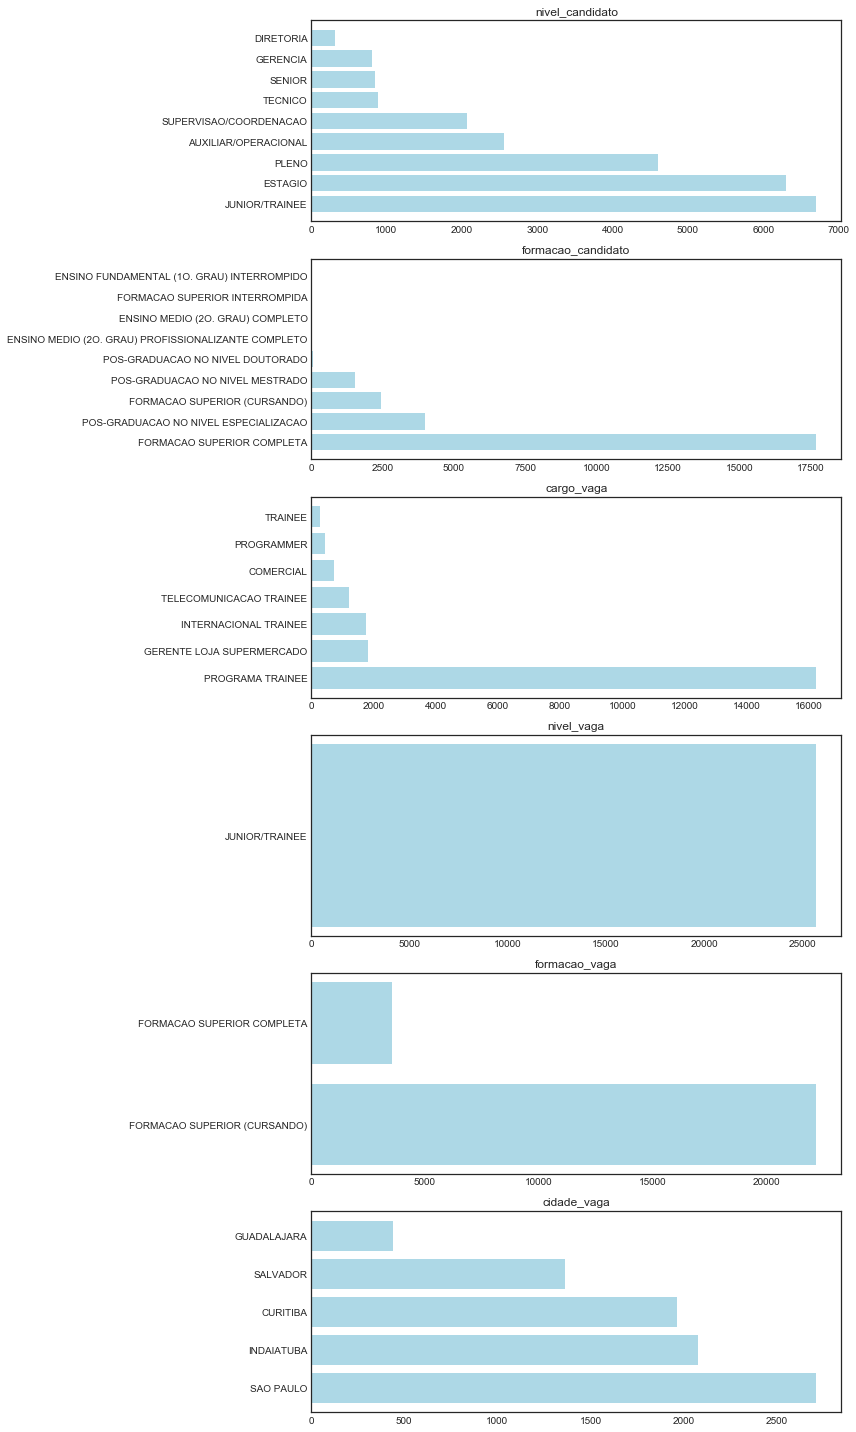

In [21]:
# Visualização categorias com poucos valores
fig, axs = plt.subplots(nrows=6, ncols=1, sharex=False, sharey=False, tight_layout=True, figsize=(12,20))

feature = 0
for i in df_cat_text:
    bars = df_cat_text[i].value_counts()
    if i not in ['ultimo_cargo_candidato', 'area_interesse_candidato',
                'cidade_candidato']:
        axs[feature].barh(bars.index, bars, color='lightblue')
        axs[feature].set_title(i)
        #axs[feature].set_xticklabels(bars.index, rotation=30)
        feature += 1

In [22]:
df_cat_text[df_cat_text['cargo_vaga'] == 'COMERCIAL']

,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga
40123,PROJETISTA,ENGENHARIA METALURGICA E DE MATERIAIS,JUNIOR/TRAINEE,POS-GRADUACAO NO NIVEL MESTRADO,RIO DE JANEIRO,COMERCIAL,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None
40124,ENGENHARIA ESTAGIO MECANICO,ENGENHARIA MECANICA,ESTAGIO,FORMACAO SUPERIOR COMPLETA,VOLTA REDONDA,COMERCIAL,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None
40125,INGLESA LINGUA PROFESSOR,ENGENHARIA QUIMICA,PLENO,POS-GRADUACAO NO NIVEL MESTRADO,UBERLANDIA,COMERCIAL,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None
40126,COORDENADOR MERCADO,ENGENHARIA - OUTRAS,SUPERVISAO/COORDENACAO,FORMACAO SUPERIOR COMPLETA,SAO BERNARDO DO CAMPO,COMERCIAL,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None
40127,ENGENHEIRO MECANICO,TRANSPORTE TERRESTRE,SUPERVISAO/COORDENACAO,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,BELO HORIZONTE,COMERCIAL,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None
...,...,...,...,...,...,...,...,...,...
40852,DESENVOLVIMENTO ESTAGIO PESQUI,None,ESTAGIO,FORMACAO SUPERIOR COMPLETA,CURITIBA,COMERCIAL,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None
40853,ACCOUNT SPECIALIST,ADMINISTRACAO COMERCIAL/VENDAS,ESTAGIO,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SAO PAULO,COMERCIAL,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None
40854,ESTAGIO,ENGENHARIA QUIMICA,ESTAGIO,POS-GRADUACAO NO NIVEL MESTRADO,NOVA IGUACU,COMERCIAL,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None
40855,ESPECIALISTA OPERADOR,ADMINISTRACAO DE EMPRESAS,SUPERVISAO/COORDENACAO,FORMACAO SUPERIOR COMPLETA,MOGI-MIRIM,COMERCIAL,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None


In [23]:
df_cat_text[df_cat_text['cargo_vaga'] == 'PROGRAMMER']

,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga
38767,ACADEMICO CAPITAL CONSULTOR HU,None,AUXILIAR/OPERACIONAL,FORMACAO SUPERIOR COMPLETA,SAN ANDRES CHOLULA,PROGRAMMER,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),GUADALAJARA
38768,BUSINESS MANAGER,None,PLENO,FORMACAO SUPERIOR COMPLETA,XALAPA,PROGRAMMER,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),GUADALAJARA
38769,DERECHO PASANTE,None,ESTAGIO,FORMACAO SUPERIOR COMPLETA,CIUDAD DE MEXICO,PROGRAMMER,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),GUADALAJARA
38770,BANCARIO,None,ESTAGIO,FORMACAO SUPERIOR (CURSANDO),NEZAHUALCOYOTL,PROGRAMMER,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),GUADALAJARA
38771,TRAINEE,None,ESTAGIO,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,CIUDAD DE MEXICO,PROGRAMMER,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),GUADALAJARA
...,...,...,...,...,...,...,...,...,...
39202,NAO CLASSIFICADO,None,None,FORMACAO SUPERIOR COMPLETA,CIUDAD DE MEXICO,PROGRAMMER,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),GUADALAJARA
39203,CMO,None,DIRETORIA,FORMACAO SUPERIOR COMPLETA,TOLUCA,PROGRAMMER,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),GUADALAJARA
39204,ENGINEER PROFESSOR,None,PLENO,FORMACAO SUPERIOR COMPLETA,METEPEC,PROGRAMMER,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),GUADALAJARA
39205,ANALISTA DESARROLLO INNOVACION,QUALIDADE,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,CIUDAD DE MEXICO,PROGRAMMER,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),GUADALAJARA


ESTAGIO                           2234
NAO CLASSIFICADO                   599
TRAINEE                            407
CONSULTOR                          285
ANALISTA                           270
                                  ... 
PSICOLOGO TECNICO                    1
PRACTICANTE DE PLANIFICACION Y       1
INOVACAO NOVA TALENTO TRAINEE        1
ASSEGURADO ESTAGIO QUALIDADE         1
GERENTE MEDICO TECNOLOGIA            1
Name: ultimo_cargo_candidato, Length: 8519, dtype: int64

NaN                               3820
ADMINISTRACAO COMERCIAL/VENDAS    2232
ENGENHARIA DE PRODUCAO            2190
ENGENHARIA - OUTRAS               1538
ENGENHARIA MECANICA               1530
                                  ... 
ODONTOLOGIA                          1
ARTES CENICAS                        1
ARQUIVOLOGIA                         1
ARTES PLASTICAS                      1
MUSICA                               1
Name: area_interesse_candidato, Length: 116, dtype: int64

SAO PAULO             631

(-0.5, 399.5, 199.5, -0.5)

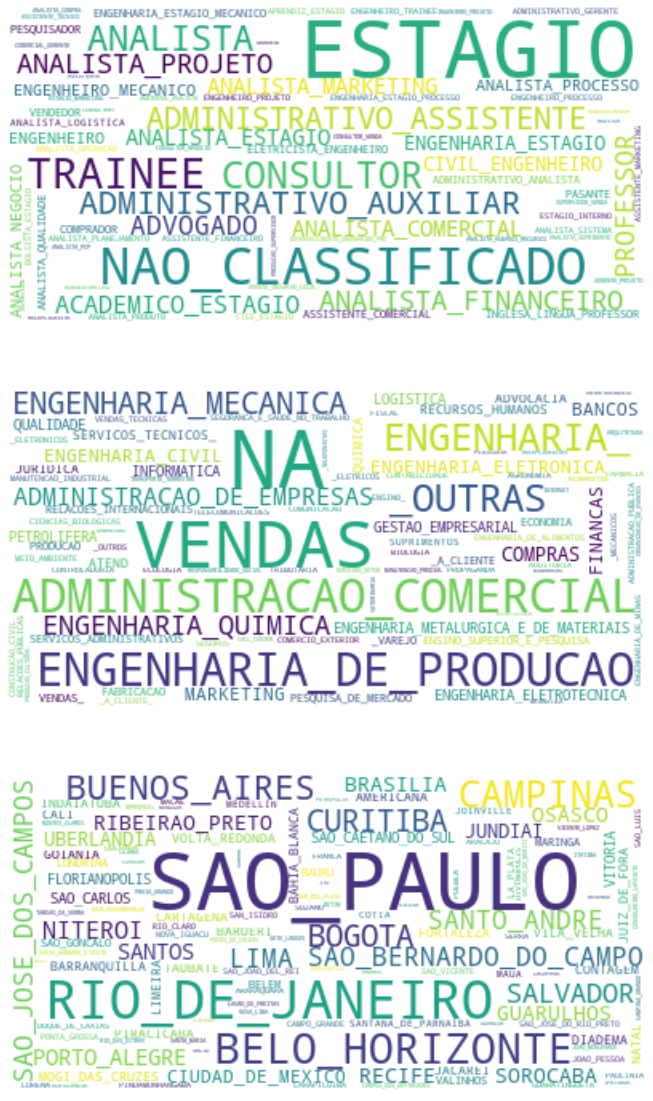

In [24]:
# Visualização categorias com muitos valores
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,20))

print(df_cat_text['ultimo_cargo_candidato'].value_counts(dropna=False))
print()
print(df_cat_text['area_interesse_candidato'].value_counts(dropna=False))
print()
print(df_cat_text['cidade_candidato'].value_counts(dropna=False))
print()

text = ','.join(df_cat_text['ultimo_cargo_candidato'].map(str.strip))
text = text.replace(' ', '_')
text = text.replace(',', ' ')
wordcloud = WordCloud(collocations=False, max_font_size=50, background_color='white').generate(text)
axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis('off')

text = ','.join(df_cat_text['area_interesse_candidato'].fillna('NA').map(str.strip))
text = text.replace(' ', '_')
text = text.replace(',', ' ')
wordcloud = WordCloud(collocations=False, max_font_size=50, background_color='white').generate(text)
axs[1].imshow(wordcloud, interpolation='bilinear')
axs[1].axis('off')


text = ','.join(df_cat_text['cidade_candidato'].fillna('NA').map(str.strip))
text = text.replace(' ', '_')
text = text.replace(',', ' ')
wordcloud = WordCloud(collocations=False, max_font_size=50, background_color='white').generate(text)
axs[2].imshow(wordcloud, interpolation='bilinear')
axs[2].axis('off')

### Variável alvo

In [25]:
df['aprovado_vaga'].unique()

array([0, 1])

In [26]:
df['aprovado_vaga'].value_counts()

0    23181
1     2518
Name: aprovado_vaga, dtype: int64

O conjunto de dados é desbalanceado, isso é, uma classe predomina sobre outra. Nesse caso, a proporção é aproximadamente 1:10. Como é esperado que vagas tenham mais candidatos que contratações, isso é parte do domínio do problema e não falta de dados ou problema de amostragem das classes.

# Limpeza de dados e engenharia de variáveis.

In [27]:
df.head()

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga,aprovado_vaga
4146,-5433147389500583028,0.0,INDUSTRIAL TRAINEE,ENGENHARIA QUIMICA,JUNIOR/TRAINEE,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SALVADOR,2.0,1.0,6.450,0.000,6.25,7.00,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4147,-5433147389500583028,1500.0,DESENVOLVIMENTO ENGENHEIRO PRO,ADMINISTRACAO DE EMPRESAS,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,4.0,1.0,8.000,0.000,7.99,8.20,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4148,-5433147389500583028,2050.0,CLIENTE ESTAGIO QUALIDADE,ENGENHARIA DE PRODUCAO,ESTAGIO,FORMACAO SUPERIOR COMPLETA,ARUJA,2.0,0.0,3.875,0.000,5.33,5.40,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4149,-5433147389500583028,0.0,CONTA EXECUTIVO PARCERIA,MARKETING,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,3.0,0.0,7.250,0.000,7.99,6.25,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4150,-5433147389500583028,1890.0,CICLO PDCA,MARKETING,AUXILIAR/OPERACIONAL,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SAO PAULO,3.0,4.0,5.250,6.375,6.65,7.00,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0


Em primeiro lugar são mantidas as variáveis que são relevantes ao problema proposto e aos dados disponíveis. São removidas colunas do conjunto que satisfaçam:

* Conter poucos valores e quantidade alta de valores ausentes: cargo_vaga;
* Identificação da vaga: codigo_vaga;
* Não ter correspondência entre candidato e vaga: area_interesse_candidato;
* Ter poucos valores no dataset: cidade_vaga;
* Após alguma remoção não ter correspondência e não ter mais relação: cidade_candidato e ultimo_cargo_candidato;

In [28]:
X = df[['ultimo_salario_candidato', 'nivel_candidato',
              'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato',
              'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato',
              'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato',
              'formacao_vaga', 'nivel_vaga']]
y = df['aprovado_vaga']

Conforme resultados da análise dos dados, o último salário do candidato terá seus valores extremos removidos. Ao invés de retirar as linhas, esses valores serão definidos como 0.0, representando que a informação não está disponível.

In [29]:
X.loc[:, 'ultimo_salario_candidato'] = df['ultimo_salario_candidato'].apply(lambda x: 0.0 if x > 10000 else x)

/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Variáveis com níveis e formação mapeadas para categorias numéricas ordenadas e valores ausentes transformados na moda da categoria.

In [30]:
X['nivel_candidato'].unique()

array(['JUNIOR/TRAINEE', 'ESTAGIO', 'AUXILIAR/OPERACIONAL', 'PLENO', None,
       'SUPERVISAO/COORDENACAO', 'DIRETORIA', 'GERENCIA', 'SENIOR',
       'TECNICO'], dtype=object)

In [31]:
X['nivel_candidato'].describe()

count              25100
unique                 9
top       JUNIOR/TRAINEE
freq                6703
Name: nivel_candidato, dtype: object

In [32]:
def mapeia_nivel(nivel):
    if nivel == 'ESTAGIO':
        return 0
    if nivel == 'TECNICO':
        return 1
    if nivel == 'AUXILIAR/OPERACIONAL':
        return 2
    if nivel == 'JUNIOR/TRAINEE' or nivel is None:
        return 3
    if nivel == 'PLENO':
        return 4
    if nivel == 'SENIOR':
        return 5
    if nivel == 'GERENCIA':
        return 6
    if nivel == 'SUPERVISAO/COORDENACAO':
        return 7
    if nivel == 'DIRETORIA':
        return 8

In [33]:
X.loc[:, 'nivel_candidato'] = df['nivel_candidato'].apply(mapeia_nivel)

In [34]:
X.loc[:, 'nivel_vaga'] = df['nivel_vaga'].apply(mapeia_nivel)

In [35]:
X['formacao_candidato'].unique()

array(['POS-GRADUACAO NO NIVEL ESPECIALIZACAO',
       'FORMACAO SUPERIOR COMPLETA', 'FORMACAO SUPERIOR (CURSANDO)',
       'POS-GRADUACAO NO NIVEL MESTRADO',
       'FORMACAO SUPERIOR INTERROMPIDA',
       'POS-GRADUACAO NO NIVEL DOUTORADO',
       'ENSINO MEDIO (2O. GRAU) PROFISSIONALIZANTE COMPLETO',
       'ENSINO MEDIO (2O. GRAU) COMPLETO',
       'ENSINO FUNDAMENTAL (1O. GRAU) INTERROMPIDO'], dtype=object)

In [36]:
def mapeia_formacao(formacao):
    if formacao == 'ENSINO FUNDAMENTAL (1O. GRAU) INTERROMPIDO':
        return 0
    if formacao in ['ENSINO MEDIO (2O. GRAU) COMPLETO', 'ENSINO MEDIO (2O. GRAU) PROFISSIONALIZANTE COMPLETO']:
        return 1
    if formacao == 'FORMACAO SUPERIOR INTERROMPIDA':
        return 2
    if formacao == 'FORMACAO SUPERIOR (CURSANDO)':
        return 3
    if formacao == 'FORMACAO SUPERIOR COMPLETA':
        return 4
    if formacao == 'POS-GRADUACAO NO NIVEL ESPECIALIZACAO':
        return 5
    if formacao == 'POS-GRADUACAO NO NIVEL MESTRADO':
        return 6
    if formacao == 'POS-GRADUACAO NO NIVEL DOUTORADO':
        return 7

In [37]:
X.loc[:, 'formacao_candidato'] = df['formacao_candidato'].apply(mapeia_formacao)

In [38]:
X.loc[:, 'formacao_vaga'] = df['formacao_vaga'].apply(mapeia_formacao)

In [39]:
X.head()

,ultimo_salario_candidato,nivel_candidato,formacao_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,formacao_vaga,nivel_vaga
4146,0.0,3,5,2.0,1.0,6.450,0.000,6.25,7.00,3,3
4147,1500.0,3,4,4.0,1.0,8.000,0.000,7.99,8.20,3,3
4148,2050.0,0,4,2.0,0.0,3.875,0.000,5.33,5.40,3,3
4149,0.0,3,4,3.0,0.0,7.250,0.000,7.99,6.25,3,3
4150,1890.0,2,5,3.0,4.0,5.250,6.375,6.65,7.00,3,3


In [40]:
X.shape

(25699, 11)

In [41]:
X.corrwith(y)

ultimo_salario_candidato           -0.022018
nivel_candidato                     0.017787
formacao_candidato                 -0.033795
nivel_ingles_candidato             -0.061208
nivel_espanhol_candidato           -0.009797
mediana_teste_ingles_candidato     -0.037206
mediana_teste_espanhol_candidato   -0.018624
mediana_teste_logica_candidato     -0.067566
mediana_teste_outros_candidato      0.063485
formacao_vaga                       0.004727
nivel_vaga                               NaN
dtype: float64

# Modelagem

Os modelos testados a seguir são aqueles que se adaptam a conjunto de dados com classes desbalanceadas, além disso, os dados são separados em dados de treino e de teste.

Também é testado o desempenho de deixar os dados brutos, em escala ou normalizados para cada modelo.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
X_train.shape

(19274, 11)

In [44]:
y_train.shape

(19274,)

## SVM Linear

In [45]:
model = LinearSVC(C=1, class_weight='balanced')
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
print(scores)
print(scores.mean())
print(scores.std())

/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.18473896 0.21498771 0.19047619 0.20533881 0.20982736]
0.20107380551196444
0.011554640267558728


/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [46]:
model = LinearSVC(C=1, class_weight='balanced')
scores = cross_val_score(model, scale(X_train), y_train, cv=5, scoring='f1')
print(scores)
print(scores.mean())
print(scores.std())

/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.23541776 0.19837398 0.20375335 0.22091782 0.22722401]
0.21713738555778644
0.014010006675385689


/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## SVM não linear

In [47]:
model = SVC(C=1, class_weight='balanced', gamma='scale')
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
print(scores)
print(scores.mean())
print(scores.std())

[0.21735395 0.21293103 0.22165821 0.19974171 0.20273738]
0.21088445769648775
0.008398238890626374


In [48]:
model = SVC(C=1, class_weight='balanced', gamma='scale')
scores = cross_val_score(model, scale(X_train), y_train, cv=5, scoring='f1')
print(scores)
print(scores.mean())
print(scores.std())

[0.28660114 0.28103539 0.27661795 0.26294416 0.27427962]
0.2762956527970174
0.00788794965116742


In [49]:
model = SVC(C=1, class_weight='balanced', gamma='scale')
scores = cross_val_score(model, normalize(X_train), y_train, cv=5, scoring='f1')
print(scores)
print(scores.mean())
print(scores.std())

[0.25137471 0.24150398 0.26751592 0.21112696 0.22129436]
0.23856318611788407
0.020307648549337365


## Floresta de árvores

In [50]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
print(scores)
print(scores.mean())
print(scores.std())

[0.17014925 0.1554878  0.17997097 0.16371078 0.19555556]
0.1729748728429888
0.013845127450989017


In [51]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
scores = cross_val_score(model, scale(X_train), y_train, cv=5, scoring='f1')
print(scores)
print(scores.mean())
print(scores.std())

[0.17575758 0.15902141 0.18550725 0.17222222 0.19230769]
0.17696322867842612
0.011439340178440864


In [52]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
scores = cross_val_score(model, normalize(X_train), y_train, cv=5, scoring='f1')
print(scores)
print(scores.mean())
print(scores.std())

[0.18313953 0.16109422 0.18235294 0.16893733 0.19316493]
0.1777377927639383
0.011339590587059072


## Ajuste de hiperparâmetros

Dentre os testes feitos, o modelo com melhor desempenho foi o SVM não linear com a técnica de normalização. A seguir os hiperparâmetros são escolhidos com base nesse modelo.

In [54]:
param_grid = [
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}
]
grid = GridSearchCV(SVC(), param_grid, scoring='f1', cv=5)
grid.fit(scale(X_train), y_train)
print(grid.best_params_) 
print(grid.best_estimator_)

/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted',

/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted',

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [56]:
param_grid = [
    {'C': [1, 10, 100], 'gamma': [0.1, 1, 10], 'kernel': ['rbf']}
]
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, scoring='f1', cv=3)
grid.fit(scale(X_train), y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## Treino do modelo escolhido e avaliação

In [58]:
model = SVC(C=1, class_weight='balanced', gamma=0.1)
scores = cross_val_score(model, scale(X_train), y_train, cv=5, scoring='f1')
print(scores)
print(scores.mean())
print(scores.std())

[0.28660114 0.28103539 0.27647366 0.26206196 0.27413333]
0.27606109643142596
0.008193880612111454


In [59]:
model = SVC(C=1, gamma=0.1, class_weight='balanced', kernel='rbf')
model.fit(scale(X_train), y_train)
y_pred = model.predict(scale(X_test))
f1_score(y_pred, y_test)

0.2874101843174008

# Classificação do conjunto de envio

In [64]:
df_sub = pd.read_pickle('./datasets/vagas/base_submission.pkl')
X_sub = df_sub[['ultimo_salario_candidato', 'nivel_candidato',
              'formacao_candidato', 'nivel_ingles_candidato', 'nivel_espanhol_candidato',
              'mediana_teste_ingles_candidato', 'mediana_teste_espanhol_candidato',
              'mediana_teste_logica_candidato', 'mediana_teste_outros_candidato',
              'formacao_vaga', 'nivel_vaga']]
X_sub.loc[:, 'ultimo_salario_candidato'] = df_sub['ultimo_salario_candidato'].apply(lambda x: 0.0 if x > 10000 else x)
X_sub.loc[:, 'nivel_candidato'] = df_sub['nivel_candidato'].apply(mapeia_nivel)
X_sub.loc[:, 'nivel_vaga'] = df_sub['nivel_vaga'].apply(mapeia_nivel)
X_sub.loc[:, 'formacao_candidato'] = df_sub['formacao_candidato'].apply(mapeia_formacao)
X_sub.loc[:, 'formacao_vaga'] = df_sub['formacao_vaga'].apply(mapeia_formacao)
X_sub.head()

/home/rodrigo/python/envs/machine-learning/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ultimo_salario_candidato,nivel_candidato,formacao_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,formacao_vaga,nivel_vaga
0,9100.0,4,4,4.0,0.0,7.00,0.00,7.335,7.0,3,3
1,7653.0,5,5,4.0,3.0,8.00,7.50,6.670,7.0,3,3
2,1978.0,1,4,3.0,0.0,4.75,6.75,7.340,7.4,3,3
3,0.0,5,4,4.0,1.0,8.00,0.00,7.500,8.5,3,3
4,2100.0,1,4,1.0,0.0,3.01,3.25,3.330,4.0,3,3


In [65]:
y_sub_pred = model.predict(scale(X_sub))

In [68]:
len(y_sub_pred[y_sub_pred == 1])

10808

In [69]:
len(y_sub_pred[y_sub_pred == 0])

15771

In [70]:
# Para submissão
df_sub = pd.read_pickle('./datasets/vagas/base_submission.pkl')
df_sub['aprovado_vaga'] = y_sub_pred
df_sub.head()

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga,aprovado_vaga
0,-5432475023076753918,9100.0,GLOBAL TRAINEE,ENGENHARIA DE PRODUCAO,PLENO,FORMACAO SUPERIOR COMPLETA,SAO PAULO,4.0,0.0,7.00,0.00,7.335,7.0,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA,1
1,-5432475023076753918,7653.0,TRADE,COMPRAS,SENIOR,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,RIO DE JANEIRO,4.0,3.0,8.00,7.50,6.670,7.0,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA,1
2,-5432475023076753918,1978.0,CONTROLADOR PRODUCAO,ENGENHARIA MECANICA,TECNICO,FORMACAO SUPERIOR COMPLETA,CACAPAVA,3.0,0.0,4.75,6.75,7.340,7.4,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA,0
3,-5432475023076753918,0.0,CONSULTOR EMPRESARIAL,SUPRIMENTOS,SENIOR,FORMACAO SUPERIOR COMPLETA,CURITIBA,4.0,1.0,8.00,0.00,7.500,8.5,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA,1
4,-5432475023076753918,2100.0,INFORMATICA REDE TECNICO,TELECOMUNICACOES,TECNICO,FORMACAO SUPERIOR COMPLETA,FEIRA DE SANTANA,1.0,0.0,3.01,3.25,3.330,4.0,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA,0


In [71]:
df_sub.to_pickle('./datasets/vagas/resultado.pkl')

In [72]:
# Verifica arquvo salvo
df_result = pd.read_pickle('./datasets/vagas/resultado.pkl')
df_result.head()

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga,aprovado_vaga
0,-5432475023076753918,9100.0,GLOBAL TRAINEE,ENGENHARIA DE PRODUCAO,PLENO,FORMACAO SUPERIOR COMPLETA,SAO PAULO,4.0,0.0,7.00,0.00,7.335,7.0,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA,1
1,-5432475023076753918,7653.0,TRADE,COMPRAS,SENIOR,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,RIO DE JANEIRO,4.0,3.0,8.00,7.50,6.670,7.0,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA,1
2,-5432475023076753918,1978.0,CONTROLADOR PRODUCAO,ENGENHARIA MECANICA,TECNICO,FORMACAO SUPERIOR COMPLETA,CACAPAVA,3.0,0.0,4.75,6.75,7.340,7.4,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA,0
3,-5432475023076753918,0.0,CONSULTOR EMPRESARIAL,SUPRIMENTOS,SENIOR,FORMACAO SUPERIOR COMPLETA,CURITIBA,4.0,1.0,8.00,0.00,7.500,8.5,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA,1
4,-5432475023076753918,2100.0,INFORMATICA REDE TECNICO,TELECOMUNICACOES,TECNICO,FORMACAO SUPERIOR COMPLETA,FEIRA DE SANTANA,1.0,0.0,3.01,3.25,3.330,4.0,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA,0


# Considerações finais

O modelo escolhido tem uma medida F1 de cerca de 30%. Como demonstrado pela análise, as variáveis escolhidas tem pouca correlação com a variável alvo. Foram realizados testes com a média das variáveis fornecidas, mas sem melhoria considerável de desempenho.

Realizando técnicas de *downsampling* os modelos gerados estavam com características de *overfitting*, por isso foi escolhida essa da entrega. No modelo entregue a pouca variância das variáveis com os aprovados e não aprovados e a configuração para maior importância da classe menor gerou um grande número de aprovados, dada a otimização para a métrica F1.

Uma das abordagens que poderia ser testada, não realizada nesta submissão, é aplicar algoritmos de *embedding* de palavras sobre a variável último cargo e cargo da vaga no contexto da aprovação para a vaga. Com isso teria-se uma nova variável de similaridade entre essas variáveis que podem auxiliar no modelo.

Além disso, outros modelos que usam redes neurais poderiam ser testados, dado que nesses modelos a função de kernel também é aprendida pelo modelo tornando a classificação mais precisa. No entanto, para essas abordagens um volume maior de dados para treinamento deveria estar disponível, bem como o tempo de treinamento do modelo poederia ser um limitante.